In [1]:
from src.partition import Partition
from src.visualization import Visualizer
from src.generators import PartitionClass
import seaborn as sns
import pandas as pd

pd.set_option('max_rows', 1000)
pd.set_option('max_columns', 1000)

Using TensorFlow backend.


In [2]:
visualizer = Visualizer(f'serialization/models/cnn_vae_20_all.h5', full_path=True)

In [3]:
partitions = [p for p in PartitionClass(20).grid_group()]
model_input = visualizer._partitions_to_inputs(partitions)
z_mean, _, _ = visualizer.encoder.predict(model_input)

W1026 18:25:58.258679 4754851264 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [4]:
x_vals, y_vals, z_vals = z_mean.T.reshape(3, -1)

In [5]:
attrs = [
    'box_size',
     'crank',
     'durfee',
     'is_almost_rectangular',
     'is_stable',
     'rank',
     'rp',
     'sum_of_parts',
    'hook_length',
    'num_corners'
]
 
partition_dicts = []
    
for ind, p in enumerate(partitions):
    p_dict = {}
    
    next_oblak = p._next_oblak_step
    p_dict["oblak"] = repr(p.oblak)
    p_dict["oblak_residue"] = next_oblak[0]
    p_dict["oblak_child"] = repr(next_oblak[1])
    p_dict["x_val"] = x_vals[ind]
    p_dict["y_val"] = y_vals[ind]
    p_dict["z_val"] = z_vals[ind]
    p_dict["partition"] = repr(p)
    
    for attr in attrs:
        p_dict[attr] = getattr(p, attr)

    partition_dicts.append(p_dict)

In [6]:
df = pd.DataFrame.from_dict(partition_dicts)

In [7]:
(df.corr('pearson').abs()*100).round()

,box_size,crank,durfee,hook_length,is_almost_rectangular,is_stable,num_corners,oblak_residue,rank,rp,sum_of_parts,x_val,y_val,z_val
box_size,100.0,11.0,0.0,2.0,1.0,3.0,2.0,1.0,14.0,1.0,1.0,2.0,9.0,13.0
crank,11.0,100.0,33.0,43.0,11.0,34.0,38.0,35.0,69.0,8.0,0.0,24.0,78.0,39.0
durfee,0.0,33.0,100.0,31.0,11.0,16.0,50.0,23.0,0.0,28.0,36.0,52.0,31.0,25.0
hook_length,2.0,43.0,31.0,100.0,22.0,2.0,6.0,19.0,0.0,19.0,61.0,14.0,70.0,36.0
is_almost_rectangular,1.0,11.0,11.0,22.0,100.0,8.0,38.0,17.0,27.0,57.0,26.0,23.0,3.0,29.0
is_stable,3.0,34.0,16.0,2.0,8.0,100.0,7.0,75.0,43.0,4.0,14.0,6.0,35.0,41.0
num_corners,2.0,38.0,50.0,6.0,38.0,7.0,100.0,1.0,19.0,62.0,39.0,41.0,20.0,7.0
oblak_residue,1.0,35.0,23.0,19.0,17.0,75.0,1.0,100.0,58.0,23.0,46.0,11.0,46.0,55.0
rank,14.0,69.0,0.0,0.0,27.0,43.0,19.0,58.0,100.0,28.0,0.0,16.0,64.0,88.0
rp,1.0,8.0,28.0,19.0,57.0,4.0,62.0,23.0,28.0,100.0,38.0,45.0,8.0,30.0


In [8]:
(df.corr('spearman').abs()*100).round()

,box_size,crank,durfee,hook_length,is_almost_rectangular,is_stable,num_corners,oblak_residue,rank,rp,sum_of_parts,x_val,y_val,z_val
box_size,100.0,7.0,0.0,2.0,0.0,2.0,2.0,3.0,10.0,3.0,2.0,2.0,9.0,9.0
crank,7.0,100.0,35.0,48.0,7.0,29.0,38.0,23.0,62.0,7.0,0.0,26.0,79.0,33.0
durfee,0.0,35.0,100.0,33.0,11.0,16.0,46.0,20.0,0.0,27.0,31.0,53.0,30.0,22.0
hook_length,2.0,48.0,33.0,100.0,19.0,1.0,6.0,18.0,0.0,19.0,53.0,15.0,70.0,33.0
is_almost_rectangular,0.0,7.0,11.0,19.0,100.0,8.0,35.0,16.0,23.0,49.0,19.0,23.0,1.0,30.0
is_stable,2.0,29.0,16.0,1.0,8.0,100.0,7.0,45.0,39.0,4.0,10.0,6.0,35.0,36.0
num_corners,2.0,38.0,46.0,6.0,35.0,7.0,100.0,5.0,18.0,61.0,33.0,43.0,18.0,11.0
oblak_residue,3.0,23.0,20.0,18.0,16.0,45.0,5.0,100.0,54.0,29.0,49.0,9.0,42.0,55.0
rank,10.0,62.0,0.0,0.0,23.0,39.0,18.0,54.0,100.0,29.0,0.0,16.0,63.0,89.0
rp,3.0,7.0,27.0,19.0,49.0,4.0,61.0,29.0,29.0,100.0,33.0,48.0,7.0,35.0


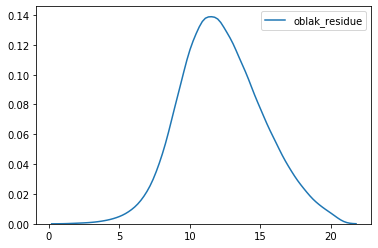

In [9]:
sns.kdeplot(df.loc[df['oblak_residue'] > 0, 'oblak_residue'])